## Space-efficient Levenshtein distance

The traditional dynamic programming approach to calculate Levenshtein distance involves filling a matrix that minimizes the distance between substrings of the sequences. <br>
This step can be inefficient for large sequences due to the $n \times m$ space complexity, where $m$ and $n$ are the lengths of the sequences.

The space-efficient implementation optimizes the distance calculation by only using a $n\times2$ matrix and updating the values iteratively. 

This notebook demonstrates how the space-efficient implementation offers significant memory savings over the traditional dynamic programming approach, especially for long sequences.

In [1]:
from methyl_aware_distance import MethylAwareDistance

import pandas as pd
import time

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
expected = 'ATGCGTACGTTAGCTAGGCTACGTAGCTAGCGTACGATCGTAGCTAGCGTGACTGCGTAGCTAGTCGATCGATGCTAGCTAGCGTACGTAGCTAGCGTACGATCGTACGTCGATCGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTACGATCGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAATGCGTACGTTAGCTAGGCTACGTAGCTAGCGTACGATCGTAGCTAGCGTGACTGCGTAGCTAGTCGATCGATGCTAGCTAGCGTACGTAGCTAGCGTACGATCGTACGTCGATCGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTACGATCGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAATGCGTACGTTAGCTAGGCTACGTAGCTAGCGTACGATCGTAGCTAGCGTGACTGCGTAGCTAGTCGATCGATGCTAGCTAGCGTACGTAGCTAGCGTACGATCGTACGTCGATCGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTACGATCGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAACGTAGCTAA'



observed_CtoT = 'ATGTGTATGTTAGTTAGGCTACGTAGCTAGCGTACGATCGTAGCTAGCGTGACTGCGTAGCTAGTCGATCGATGCTAGCTAGCGTACGTAGCTAGCGTACGATCGTACGTCGATCGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTACGATCGTACGTAGCTAGCTAGCGTACGTAGTTAGCGTACGTAGCTAGCTAGCGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAATGCGTACGTTAGCTAGGCTACGTAGCTAGCGTACGATCGTAGCTAGCGTGACTGCGTAGCTAGTCGATCGATGCTAGCTAGCGTACGTAGCTAGCGTACGATCGTACGTCGATCGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTAGTTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTACGATCGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAATGCGTACGTTAGCTAGGCTACGTAGCTAGCGTACGATCGTAGCTAGCGTGACTGCGTAGCTAGTCGATCGATGCTAGCTAGCGTACGTAGCTAGCGTACGATCGTACGTCGATCGTAGCTAGTTAGCGTATGTAGCTAGCGTACGTAGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTACGATCGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAACGTAGCTAA'

observed_GtoA = 'ATACATACATTAGCTAGGCTACGTAGCTAGCGTACGATCGTAGCTAGCGTGACTGCGTAGCTAGTCGATCGATGCTAGCTAGCGTACGTAGCTAGCGTACGATCGTACGTCGATCGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTACGATCGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAATGCGTACGTTAGCTAGGCTACGTAGCTAGCGTACGATCGTAGCTAGCGTGACTGCGTAGCTAGTCGATCGATGCTAGCTAGCGTACGTAGCTAGCGTACGATCGTACGTCGATCGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTAACTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTACGATCGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAATGCGTACGTTAGCTAGGCTACGTAGCTAGCGTACGATCGTAGCTAGCGTGACTGCGTAGCTAGTCGATCGATGCTAGCTAGCGTACGTAGCTAGCGTACGATCGTACGTCGATCGTAGCTAGCTAACGTACGTAGCTAGCGTACGTAGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTACGATCGTACGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAGCTAGCGTAGCTAGCTAGCGTACGTAGCTAGCGTACGTAGCTAACGTAGCTAA'


len(expected), len(observed_CtoT), len(observed_GtoA)

(1000, 1000, 1000)

In [12]:
reps = 10
steps = 100

time_dp = {}
for nbases in range(0, len(expected), steps):
    time_dp[nbases] = []
    for _ in range(reps):
        start = time.time()
        edit_distance = MethylAwareDistance(expected[:nbases], observed_CtoT[:nbases])
        edit_distance.levenshtein_methyl_aware()
        end = time.time()
        time_dp[nbases].append(end - start)

time_sp = {}
for nbases in range(0, len(expected), steps):
    time_sp[nbases] = []
    for _ in range(reps):
        start = time.time()
        edit_distance = MethylAwareDistance(expected[:nbases], observed_CtoT[:nbases])
        edit_distance.space_efficient_levenshtein_methyl_aware()
        end = time.time()
        time_sp[nbases].append(end - start)

In [13]:
timeXlength_dp = pd.DataFrame(time_dp).melt(var_name='sequence_length',value_name='time')
timeXlength_sp = pd.DataFrame(time_sp).melt(var_name='sequence_length',value_name='time')

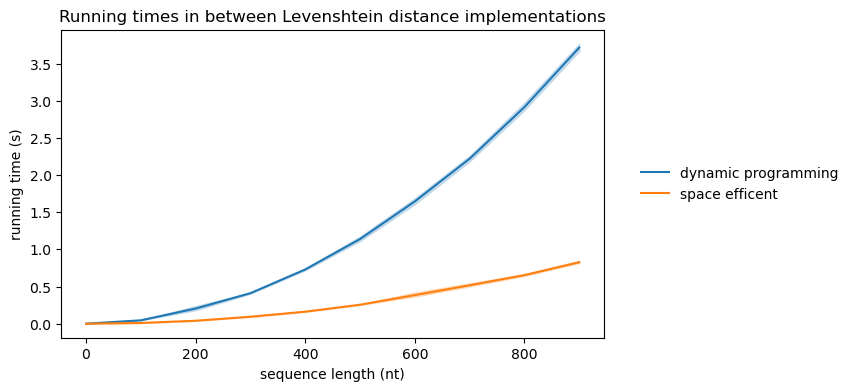

In [14]:
plt.figure(figsize=(7,4))
plt.title('Running times in between Levenshtein distance implementations')
sns.lineplot(data=timeXlength_dp, x='sequence_length', y='time',label='dynamic programming')
sns.lineplot(data=timeXlength_sp, x='sequence_length', y='time',label='space efficent')

plt.legend(bbox_to_anchor=(1.25,0.5),loc='center',frameon=False)
plt.xlabel('sequence length (nt)')
plt.ylabel('running time (s)')
plt.show()